# Visual Q&A Demo

## Setup
1-Adds required packages to Julia.   
2-Downloads sample data and a pretrained model. 

In [1]:
include("demosetup.jl")

INFO: Downloading pre-trained model from our servers...
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
 99 75.9M   99 75.8M    0     0   441k      0  0:02:56  0:02:55  0:00:01  446k    0   301k      0  0:04:17  0:00:01  0:04:16  301kM   12 9484k    0     0   435k      0  0:02:58  0:00:21  0:02:37  452k 0:00:22  0:02:36  449k   439k      0  0:02:56  0:01:00  0:01:56  437k 0     0   441k      0  0:02:56  0:02:36  0:00:20  444k

"models/macnet.jld"

## Initialization
1-Loads the sample demo data (image features,questions,vocabulary).   
2-Loads the pretrained model.   

In [30]:
include("src/newmacnetwork.jl")
feats,qstsns,(w2i,a2i,i2w,i2a) = loadDemoData("data/demo/");
_,wrun,r,_,o = loadmodel("models/macnet.jld";onlywrun=true);
if !(typeof(first(wrun)) <: atype)
    wrun = map(atype,wrun);
end;

INFO: Loading demo features ...
INFO: Loading demo questions ...
INFO: Loading dictionaries ...


## Sample Data
1-Randomly selects (question,image) pair from the sample data   
2-Make predictions for the question and checks whether the prediction is correct   

In [11]:
rnd        = rand(1:length(qstsns))
inst       = qstsns[rnd]
feat       = atype(feats[:,:,:,rnd:rnd])
question   = Array{Int}(inst[2])
answer     = inst[3];
family     = inst[4];
results,prediction = singlerun(wrun,r,feat,question;p=o[:p]);
answer==prediction

true

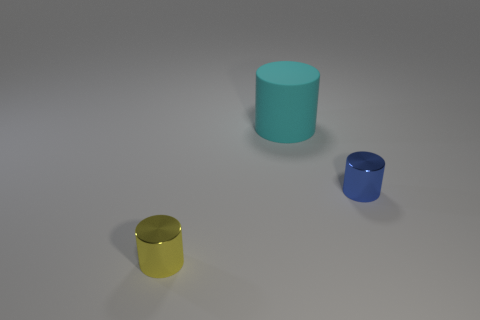

In [12]:
img = load("data/demo/CLEVR_v1.0/images/val/$(inst[1])")

In [13]:
textq  = i2w[question];
println("Question: ",join(textq," "))
texta  = i2a[answer];
println("Answer: $(texta)\nPrediction: $(i2a[prediction]) ")

Question: Is the number of blue cylinders greater than the number of large purple matte cylinders ?
Answer: yes
Prediction: yes 


## User Data
You can enter your own question about the image and test whether the prediction is correct

In [28]:
userinput = readline(STDIN)
words = split(userinput) # tokenize(userinput)
question = [get!(w2i,wr,1) for wr in words]
results,prediction = singlerun(wrun,r,feat,question;p=o[:p]);
println("Question: $(join(i2w[question]," "))")
println("Prediction: $(i2a[prediction])")

stdin> how many object are there ?
Question: how many object are there ?
Prediction: 3


## Visualize
`visualize` function visualizes attention maps for each time step of the mac network

Top-3 Attended Words:
("?", "56.54%")
("there", "28.50%")
("are", "9.98%")
Image Attention Map: 

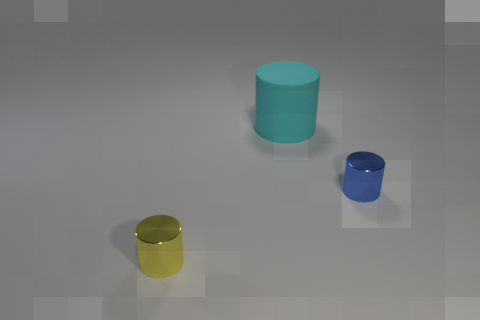

Top-3 Attended Words:
("how", "20.67%")
("?", "18.59%")
("there", "17.31%")
Image Attention Map: 

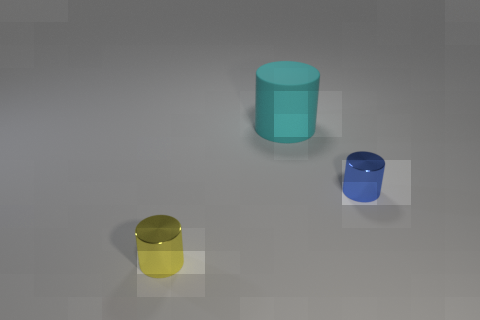

Top-3 Attended Words:
("there", "31.30%")
("are", "28.34%")
("?", "26.74%")
Image Attention Map: 

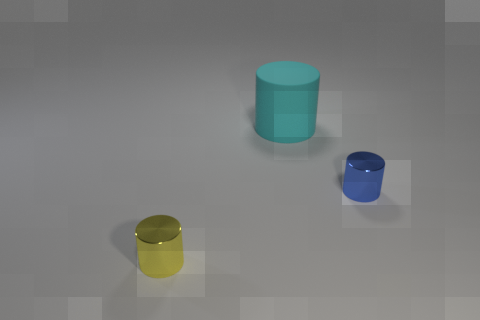

Top-3 Attended Words:
("many", "21.57%")
("object", "21.22%")
("?", "17.98%")
Image Attention Map: 

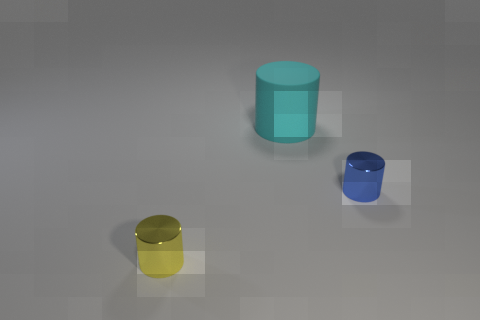

Top-3 Attended Words:
("?", "36.34%")
("many", "22.59%")
("how", "13.44%")
Image Attention Map: 

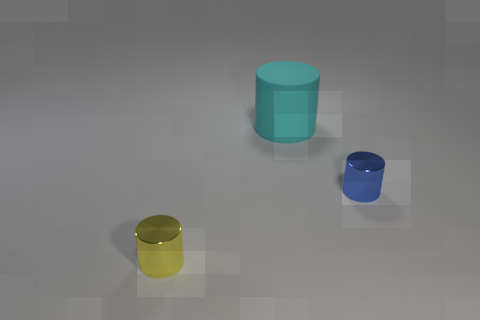

Top-3 Attended Words:
("many", "48.46%")
("how", "21.14%")
("object", "13.15%")
Image Attention Map: 

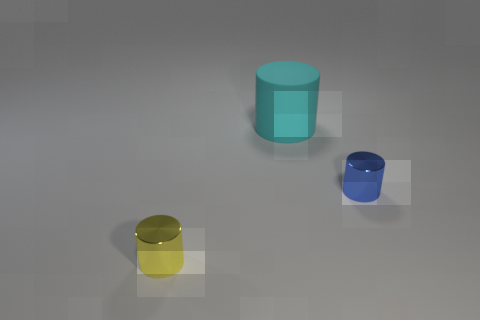

Top-3 Attended Words:
("how", "63.43%")
("many", "21.25%")
("object", "5.50%")
Image Attention Map: 

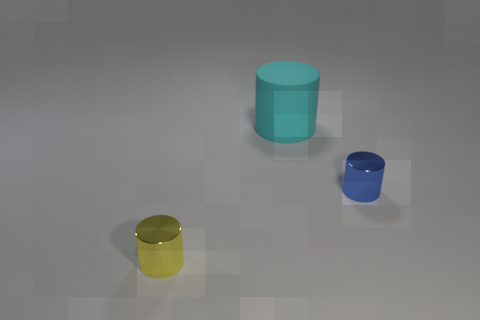

Top-3 Attended Words:
("are", "26.14%")
("object", "25.13%")
("how", "14.74%")
Image Attention Map: 

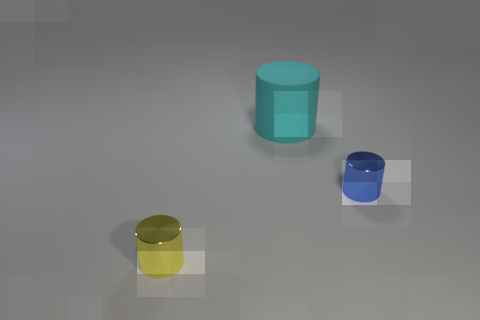

Top-3 Attended Words:
("?", "47.87%")
("there", "19.97%")
("how", "12.17%")
Image Attention Map: 

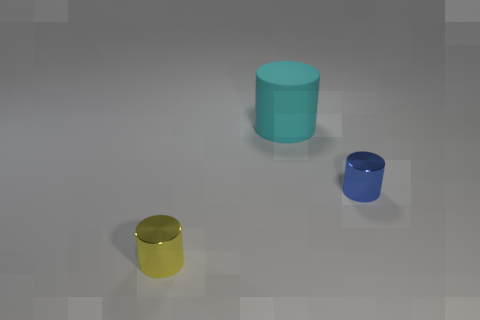

Top-3 Attended Words:
("many", "27.69%")
("how", "19.51%")
("are", "18.00%")
Image Attention Map: 

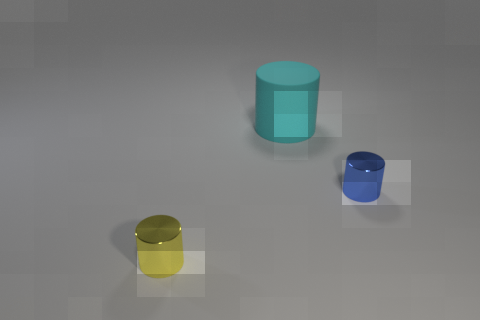

Top-3 Attended Words:
("object", "34.56%")
("how", "31.18%")
("many", "25.27%")
Image Attention Map: 

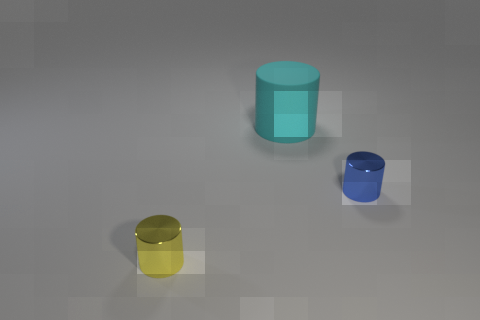

Top-3 Attended Words:
("many", "31.80%")
("how", "19.07%")
("object", "18.59%")
Image Attention Map: 

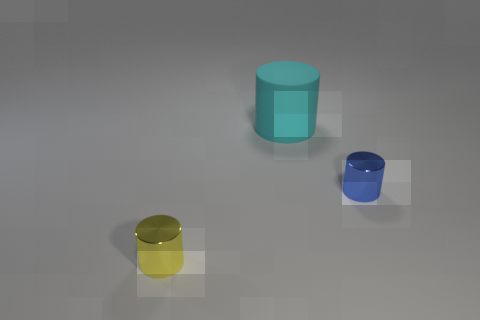

In [31]:
visualize(img,results;p=o[:p])